# 1. Find the optimal threshold based on ROC curve or Precision-Recall Curve:

thresholds: [1.99999835e+00 9.99998347e-01 4.96107783e-01 4.64133790e-01
 4.37378298e-01 4.10290652e-01 3.60605429e-01 3.18080562e-01
 2.66733994e-01 2.58835081e-01 2.56035560e-01 2.39921159e-01
 2.22567047e-01 1.43505643e-01 1.41327098e-01 1.09726224e-01
 1.07837317e-01 9.20957096e-02 9.02480016e-02 7.34506191e-02
 6.96974524e-02 6.27586051e-02 6.03914597e-02 4.93544524e-02
 4.92428780e-02 4.17944224e-02 4.17364870e-02 2.99406545e-02
 2.98037729e-02 1.93442867e-02 1.93349888e-02 1.86417850e-02
 1.86356233e-02 1.61540845e-02 1.61528512e-02 8.85173160e-03
 8.83828307e-03 4.91894272e-03 4.86537595e-03 2.76888081e-03
 2.76565429e-03 2.22207193e-03 2.21906816e-03 7.26905980e-07]


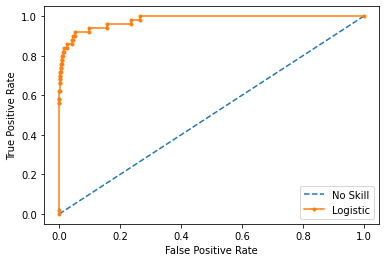

In [0]:
#* roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#* generate dataset
X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y = 0, random_state = 4)
#* split into train/test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.5, random_state = 2, stratify = y)
#* fit a model
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_X, train_y)
#* predict probabilities
y_hat = model.predict_proba(test_X)
#* keep probabilites for the positive outcome only
y_hat = y_hat[:, 1]
#* calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_hat)
print("thresholds: {}".format(thresholds))
#* plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle = '--', label = 'No Skill')
pyplot.plot(fpr, tpr, marker = '.', label = 'Logistic')
#* axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
#* show the plot
pyplot.show()

Best Threshold=0.016152851152469214, G-Mean=0.933


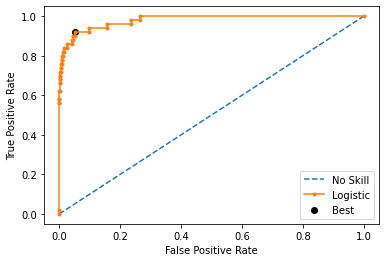

In [0]:
#* roc curve for logistic regression model with optimal threshold by using G-mean evaluation method
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#* generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
#* split into train/test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
#* fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_y)
#* predict probabilities
y_hat = model.predict_proba(test_X)
#* keep probabilites for the positive outcome only
y_hat = y_hat[:, 1]
#* calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_hat)
#* calculate the g-mean for each threshold
g_means = sqrt(tpr*(1-fpr))
#* locate the index of the largest g-mean
ix = argmax(g_means)
print("Best Threshold={}, G-Mean={:.3f}".format(thresholds[ix], g_means[ix]))
#* plot the ros curve for the model
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
#* axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
#*show the plot
pyplot.show()

Best Threshold=0.016152851152469214, J=0.867


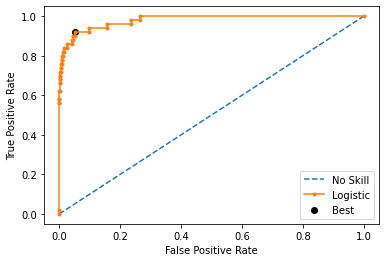

In [0]:
#* roc curve for logistic regression model with optimal threshold by using Youden's J statistic evaluation method
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

#* generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
#* split into train/test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
#* fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_y)
#* predict probabilities
y_hat = model.predict_proba(test_X)
#* keep probabilites for the positive outcome only
y_hat = y_hat[:, 1]
#* calculate roc curves
fpr, tpr, thresholds = roc_curve(test_y, y_hat)

# #* calculate the g-mean for each threshold
# g_means = sqrt(tpr*(1-fpr))
# #* locate the index of the largest g-mean
# ix = argmax(g_means)
# print("Best Threshold={}, G-Mean={:.3f}".format(thresholds[ix], g_means[ix]))

#* get the bast threshold
J = tpr - fpr
ix = argmax(J)
print("Best Threshold={}, J={:.3f}".format(thresholds[ix], J[ix]))

#* plot the ros curve for the model
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
#* axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
#*show the plot
pyplot.show()

[0 0 0 ... 0 0 0]
5000
[False False False ... False False False]


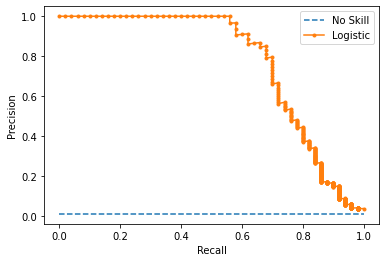

In [0]:
#* pr curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

#* generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
#* split into train/test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
#* fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_y)
#* predict probabilities
y_hat = model.predict_proba(test_X)
#* keep probabilites for the positive outcome only
y_hat = y_hat[:, 1]
#* calculate pr-curve
precision, recall, thresholds = precision_recall_curve(test_y, y_hat)
#* plot the ros curve for the model
no_skill = len(test_y[test_y==1])/len(test_y)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
#* axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
#*show the plot
pyplot.show()

In [0]:
#* one test codes
import numpy as np
test_y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])
print(test_y)
test_y_label = test_y==1
print(test_y_label)
test_y = test_y[test_y_label]
print(test_y)

[0 0 0 0 0 1 1 1 0 1 0]
[False False False False False  True  True  True False  True False]
[1 1 1 1]


Best Threshold=0.256035559799064, F-Score=0.756


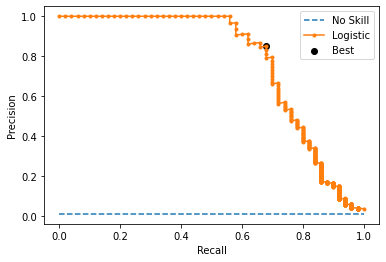

In [0]:
#* optimal threshold for precision-recall curve with logisitc regression model
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

#* generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
#* split into train/test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
#* fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_y)
#* predict probabilities
y_hat = model.predict_proba(test_X)
#* keep probabilites for the positive outcome only
y_hat = y_hat[:, 1]
#* calculate pr-curve
precision, recall, thresholds = precision_recall_curve(test_y, y_hat)
#* clauclate f-mean score
f_score = (2 * precision * recall) / (precision + recall)
#* locate the index of the largest f score
ix = argmax(f_score)
print("Best Threshold={}, F-Score={:.3f}".format(thresholds[ix], f_score[ix]))
#* plot the pr curve for the model
no_skill = len(test_y[test_y==1])/len(test_y)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
#* axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
#*show the plot
pyplot.show()

# 2. Optimal Threshold Tuning

In [1]:
#* search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#* apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
  return (pos_probs >= threshold).astype('int')

#* genrate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

#* split into train/test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

#* fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_y)
#* predict probabilities
y_hat = model.predict_proba(test_X)
#* Keep probabilites for the positive outcome only
probs = y_hat[:, 1]
#* define thresholds
thresholds = arange(0, 1, 0.001)
#* evaluate each threshold
scores = [f1_score(test_y, to_labels(probs, t)) for t in thresholds]
#* get best threshold
ix = argmax(scores)
print("Threshold={:.3f}, F-Score={:.5f}".format(thresholds[ix], scores[ix]))

Threshold=0.251, F-Score=0.75556
